In [1]:
import matplotlib.pyplot as plt
from math import *
import numpy as np

# Creation of Patterns

## Quasiperiodic

In [2]:
class Point2D:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.coords = np.array([x, y])
        self.lambda_ = None
        self.mu_ = None
        self.proj_e = None
        self.proj_eint = None

    def set_projections(self, v):
        a1, a2 = v
        w = [-a2, a1]
        p1, p2 = self.x, self.y
        self.lambda_ = (a1 * p1 + a2 * p2) / (a1**2 + a2**2)
        self.proj_e = [self.lambda_ * a1, self.lambda_ * a2]
        self.mu_ = (a1 * p2 - a2 * p1) / (a1**2 + a2**2)
        self.proj_eint = [self.mu_ * w[0], self.mu_ * w[1]]

    def distance_to_proj(self):
        return sqrt((self.x - self.proj_e[0])**2 + (self.y - self.proj_e[1])**2)

In [3]:
lattice = [Point2D(x, y) for x in range(-500, 501) for y in range(-500, 501)]
cell_vertices = [Point2D(1, 0), Point2D(0, 1)]

In [4]:
def process_line(v, lattice, cell_vertices, label='', plot_range=(-5, 5)):
    lattice_copy = [Point2D(p.x, p.y) for p in lattice]
    cell_vertices_copy = [Point2D(p.x, p.y) for p in cell_vertices]

    for p in lattice_copy:
        p.set_projections(v)
    for p in cell_vertices_copy:
        p.set_projections(v)

    a1, a2 = v
    width_strip = sqrt(
        (cell_vertices_copy[0].proj_eint[0] - cell_vertices_copy[1].proj_eint[0])**2 +
        (cell_vertices_copy[0].proj_eint[1] - cell_vertices_copy[1].proj_eint[1])**2
    )

    strip_points = [p for p in lattice_copy if p.distance_to_proj() <= width_strip / 2]
    proj_points = [p.proj_e for p in strip_points]

    x = np.linspace(*plot_range, 400)
    m = a2 / a1
    b = (width_strip / 2) / sqrt(a1**2 + a2**2) * (a1 + a2**2 / a1)
    plt.figure(figsize=(8,8))
    plt.scatter([p.proj_e[0] for p in strip_points], [p.proj_e[1] for p in strip_points], s=8, color='red', label='proj_points')
    plt.scatter([p.x for p in strip_points], [p.y for p in strip_points], s=8, color='blue', alpha=0.5, label='strip_points')
    plt.plot(x, m*x, 'k-', label='E')
    plt.plot(x, m*x + b, 'g--', label='window')
    plt.plot(x, m*x - b, 'g--')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(label)
    plt.xticks(np.arange(-5, 6, 1))
    plt.yticks(np.arange(-5, 6, 1))
    plt.grid(True, which='both', color='gray', linewidth=0.7, linestyle='--', alpha=0.7)
    plt.axis('equal')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.legend()
    plt.show()

    return proj_points, strip_points

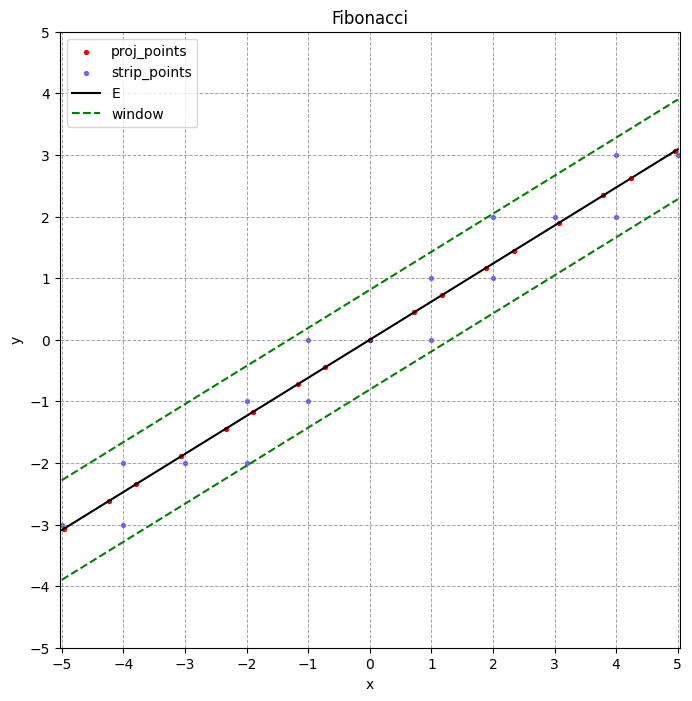

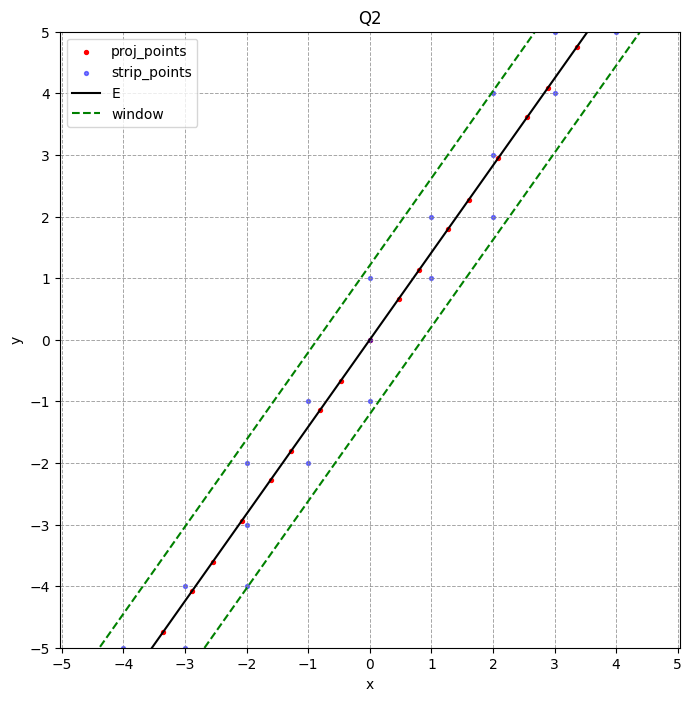

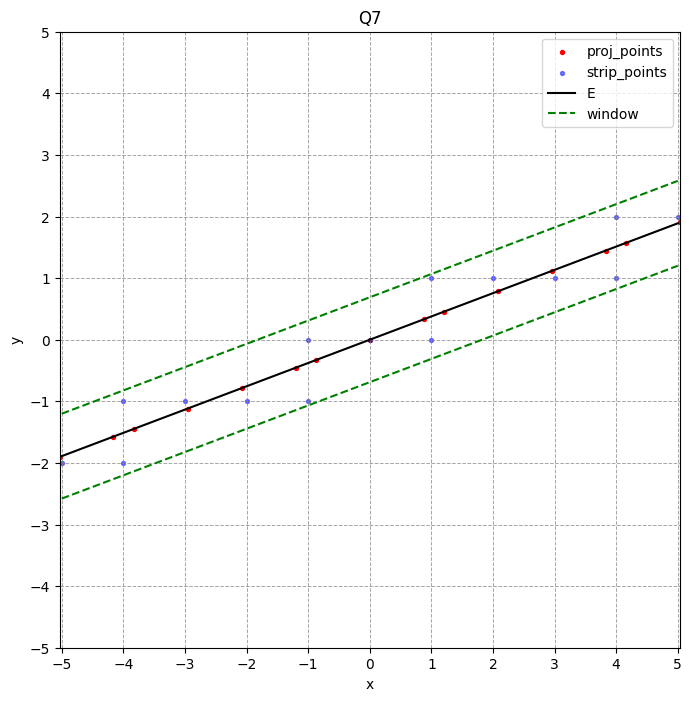

In [5]:
proj_points_dict = {}
strip_points_dict = {}

vectors = {
    'Fibonacci': [(1 + sqrt(5)) / 2, 1],
    'Q2': [1, sqrt(2)],
    'Q7': [sqrt(7), 1]
}

for label, v in vectors.items():
    proj_points, strip_points = process_line(v, lattice, cell_vertices, label=label)
    proj_points_dict[label] = proj_points
    strip_points_dict[label] = strip_points

In [6]:
# Convert 2D quasiperiodic pattern coordinates to 1D by projecting onto the direction vector
proj_points_1d_dict = {}

for label, v in vectors.items():
    v = np.array(v)
    v_unit = v / np.linalg.norm(v)
    proj_points = np.array(proj_points_dict[label])  # (N,2)
    proj_points_1d = proj_points @ v_unit
    proj_points_1d_dict[label] = proj_points_1d


In [7]:
for label in proj_points_1d_dict:
    print(f"Number of 1D projected points in {label}: {len(proj_points_1d_dict[label])}")

Number of 1D projected points in Fibonacci: 1619
Number of 1D projected points in Q2: 1709
Number of 1D projected points in Q7: 1379


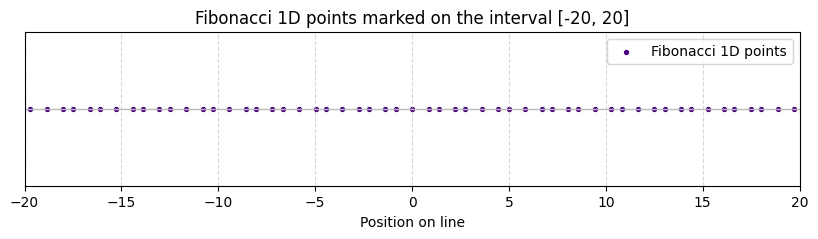

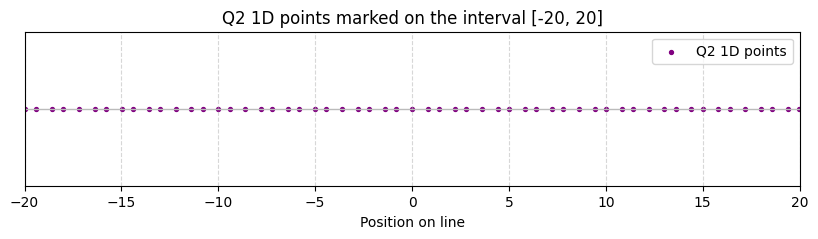

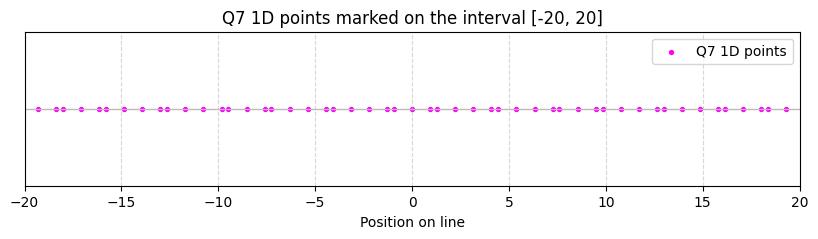

In [8]:
# Plot a line from -20 to 20 with the points marked on it for each 1D pattern, with custom colors
colors = {
    'Fibonacci': 'indigo',
    'Q2': 'purple',
    'Q7': 'magenta'
}

for label in proj_points_1d_dict:
    points_1d = proj_points_1d_dict[label]
    plt.figure(figsize=(10, 2))
    plt.plot([-20, 20], [0, 0], color='#bbbbbb', linewidth=1)  # Line from -20 to 20, light gray
    # Select only points within [-20, 20]
    mask = (points_1d >= -20) & (points_1d <= 20)
    plt.scatter(points_1d[mask], np.zeros(np.sum(mask)), s=8, color=colors[label], label=f'{label} 1D points')
    plt.xlim(-20, 20)
    plt.ylim(-1, 1)
    plt.yticks([])
    plt.xlabel("Position on line")
    plt.title(f"{label} 1D points marked on the interval [-20, 20]")
    plt.legend()
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)
    plt.show()

## Periodic

In [9]:
# Get the 1D Fibonacci points
fib_points_1d = proj_points_1d_dict['Fibonacci']
n_points = len(fib_points_1d)
min_fib = np.min(fib_points_1d)
max_fib = np.max(fib_points_1d)

# Generate periodic 1D points, equally spaced in the same interval
periodic_1d = np.linspace(min_fib, max_fib, n_points)

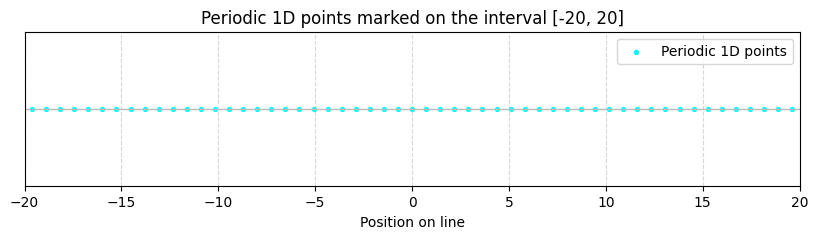

In [10]:
# Plot a line from -20 to 20 with the periodic 1D points marked on it
plt.figure(figsize=(10, 2))
plt.plot([-20, 20], [0, 0], color='#bbbbbb', linewidth=1)  # Line from -20 to 20, light gray
mask = (periodic_1d >= -20) & (periodic_1d <= 20)
plt.scatter(periodic_1d[mask], np.zeros(np.sum(mask)), color='aqua', s=8, label='Periodic 1D points')
plt.xlim(-20, 20)
plt.ylim(-1, 1)
plt.yticks([])
plt.xlabel("Position on line")
plt.title("Periodic 1D points marked on the interval [-20, 20]")
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()

## Random (Poisson)

In [11]:
# Generate random (Poisson) 1D points in the same interval and with the same number of points, using exponential inter-point distances
np.random.seed(42)  # For reproducibility

lambda_rate = 1.5  # Intensity parameter
inter_distances = np.random.exponential(scale=1/lambda_rate, size=n_points)
points = np.cumsum(inter_distances)
# Scale to fit in [min_fib, max_fib]
poisson_1d = (points / points[-1]) * (max_fib - min_fib) + min_fib

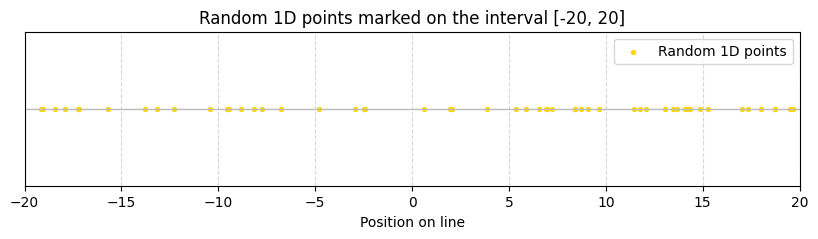

In [12]:
# Plot a line from -20 to 20 with the Poisson (random) 1D points marked on it
plt.figure(figsize=(10, 2))
plt.plot([-20, 20], [0, 0], color='#bbbbbb', linewidth=1)  # Line from -20 to 20, light gray
mask = (poisson_1d >= -20) & (poisson_1d <= 20)
plt.scatter(poisson_1d[mask], np.zeros(np.sum(mask)), color='gold', s=8, label='Random 1D points')
plt.xlim(-20, 20)
plt.ylim(-1, 1)
plt.yticks([])
plt.xlabel("Position on line")
plt.title("Random 1D points marked on the interval [-20, 20]")
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()

## Summary

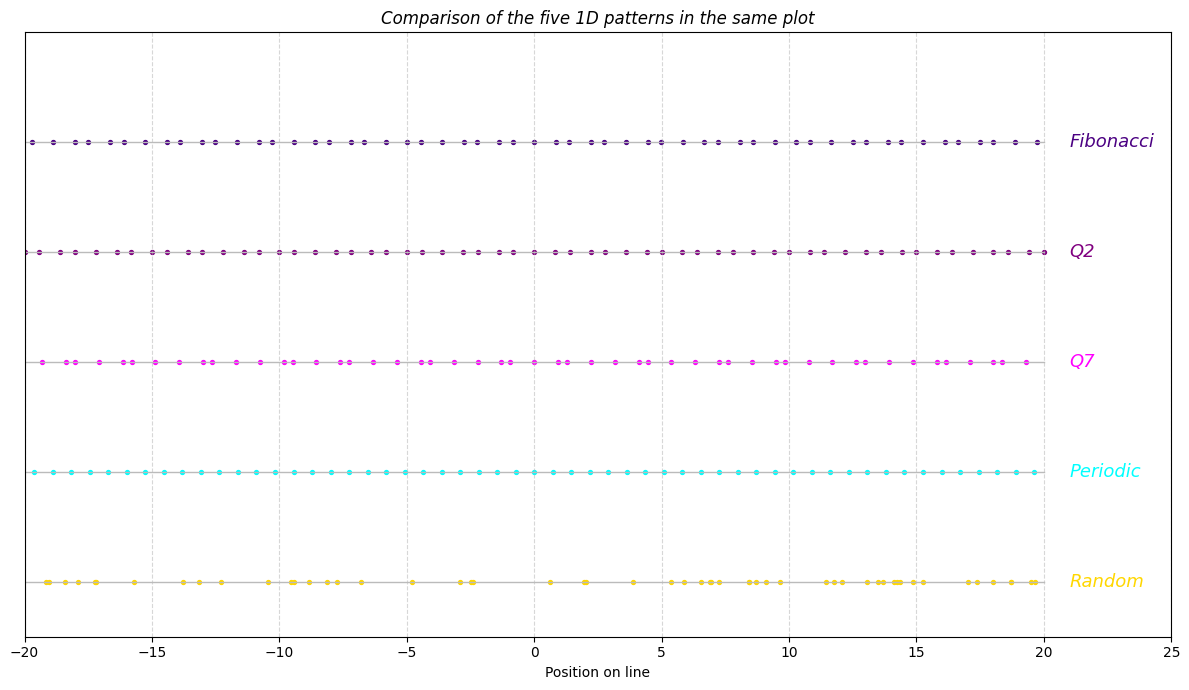

In [13]:
colors = {
    'Fibonacci': 'indigo',
    'Q2': 'purple',
    'Q7': 'magenta',
    'Periodic': 'aqua',
    'Random': 'gold'
}

patterns = [
    ('Fibonacci', proj_points_1d_dict['Fibonacci']),
    ('Q2', proj_points_1d_dict['Q2']),
    ('Q7', proj_points_1d_dict['Q7']),
    ('Periodic', periodic_1d),
    ('Random', poisson_1d)
]

plt.figure(figsize=(12, 7))

for i, (label, points_1d) in enumerate(patterns):
    y_offset = -i * 2  
    plt.plot([-20, 20], [y_offset, y_offset], color='#bbbbbb', linewidth=1)
    mask = (points_1d >= -20) & (points_1d <= 20)
    x_points = points_1d[mask]
    plt.scatter(x_points, np.full_like(x_points, y_offset), s=8, color=colors[label])
    plt.text(21, y_offset, label, va='center', fontsize=13, color=colors[label], fontstyle='italic')

plt.yticks([])
plt.ylim(-2*len(patterns)+1, 2)
plt.xlim(-20, 25)
plt.xlabel("Position on line")
plt.title("Comparison of the five 1D patterns in the same plot", fontstyle='italic')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Number of Variance

In [14]:
for label, points_1d in patterns:
    min_val = np.min(points_1d)
    max_val = np.max(points_1d)
    print(f"{label}: [{min_val:.3f}, {max_val:.3f}]")

Fibonacci: [-587.776, 587.776]
Q2: [-612.630, 612.630]
Q7: [-534.529, 534.529]
Periodic: [-587.776, 587.776]
Random: [-587.437, 587.776]


In [15]:
# For fair comparison, we use the same box for all patterns: the smallest interval among the five patterns.
# This ensures that all density fluctuation calculations are performed in the same region.

# Find the smallest interval among all patterns
intervals = []
for label, points_1d in patterns:
    min_val = np.min(points_1d)
    max_val = np.max(points_1d)
    intervals.append((min_val, max_val))

# Get the largest min and smallest max (intersection of all intervals)
box_min = max([interval[0] for interval in intervals])
box_max = min([interval[1] for interval in intervals])
box_length = box_max - box_min

print(f"Box limits for density fluctuation: [{box_min:.3f}, {box_max:.3f}] (length = {box_length:.3f})")

Box limits for density fluctuation: [-534.529, 534.529] (length = 1069.058)


In [16]:
# Define radii: min as before, max as box_length/4, log-spaced
radius = np.logspace(np.log10(2), np.log10(box_length/4), 30)
print(radius)

[  2.           2.36775779   2.80313848   3.31857649   3.92879268
   4.65121474   5.50647497   6.51899951   7.71770594   9.13682919
  10.81689926  12.80589876  15.16063329  17.9483538   21.24867729
  25.15586062  29.7814925   35.25768047  41.74082384  49.41608046
  58.5026548   69.26005839  81.99552148  97.07276748 114.92240082
 136.05420504 161.0717021  190.6893889  225.75314327 267.26438208]


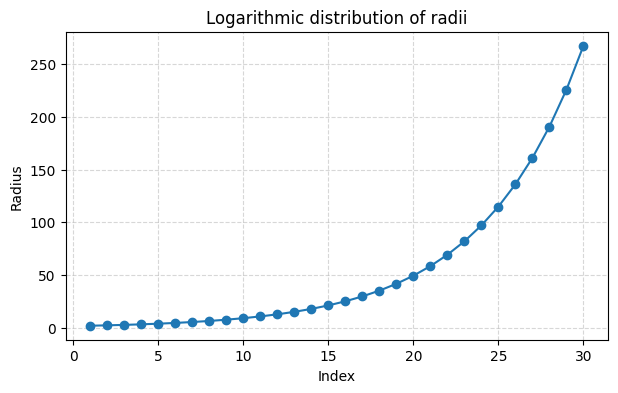

In [17]:
plt.figure(figsize=(7,4))
plt.plot(np.arange(1, len(radius)+1), radius, marker='o')
plt.xlabel('Index')
plt.ylabel('Radius')
plt.title('Logarithmic distribution of radii')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()

In [18]:
# Prepare for density fluctuation calculation
n_samples = 1000  # Number of samples per radius and pattern
results = []

np.random.seed(1234)  # For reproducibility

for label, points_1d in patterns:
    # Only consider points inside the common box
    mask = (points_1d >= box_min) & (points_1d <= box_max)
    points_in_box = points_1d[mask]

    for r in radius:
        # The center of the interval for the circle must be within [box_min + r, box_max - r]
        sub_min = box_min + r
        sub_max = box_max - r

        if sub_min > sub_max:
            # If the radius is too large, skip
            results.append({
                'pattern': label,
                'radius': r,
                'mean_density': np.nan,
                'var_density': np.nan,
                'mean_count': np.nan,
                'var_count': np.nan
            })
            continue

        counts = []
        densities = []
        length_circle = 2 * r  # In 1D, the "circle" is just an interval of length 2r

        for _ in range(n_samples):
            center = np.random.uniform(sub_min, sub_max)
            n_in = np.sum((points_in_box >= center - r) & (points_in_box <= center + r))
            counts.append(n_in)
            densities.append(n_in / length_circle)

        results.append({
            'pattern': label,
            'radius': r,
            'mean_density': np.mean(densities),
            'var_density': np.var(densities),
            'mean_count': np.mean(counts),
            'var_count': np.var(counts)
        })

# Convert results to DataFrame
import pandas as pd
df = pd.DataFrame(results)
df_summary = df.pivot_table(index='radius', columns='pattern', values='var_count')
print(df.head())
df.head()

     pattern    radius  mean_density  var_density  mean_count  var_count
0  Fibonacci  2.000000      1.380750     0.015592       5.523   0.249471
1  Fibonacci  2.367758      1.375563     0.011139       6.514   0.249804
2  Fibonacci  2.803138      1.376314     0.006724       7.716   0.211344
3  Fibonacci  3.318576      1.377398     0.004128       9.142   0.181836
4  Fibonacci  3.928793      1.379050     0.003452      10.836   0.213104


,pattern,radius,mean_density,var_density,mean_count,var_count
0,Fibonacci,2.000000,1.380750,0.015592,5.523,0.249471
1,Fibonacci,2.367758,1.375563,0.011139,6.514,0.249804
2,Fibonacci,2.803138,1.376314,0.006724,7.716,0.211344
3,Fibonacci,3.318576,1.377398,0.004128,9.142,0.181836
4,Fibonacci,3.928793,1.379050,0.003452,10.836,0.213104


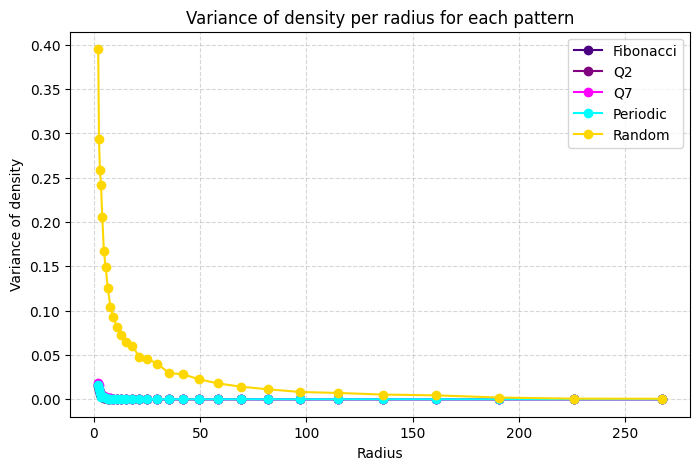

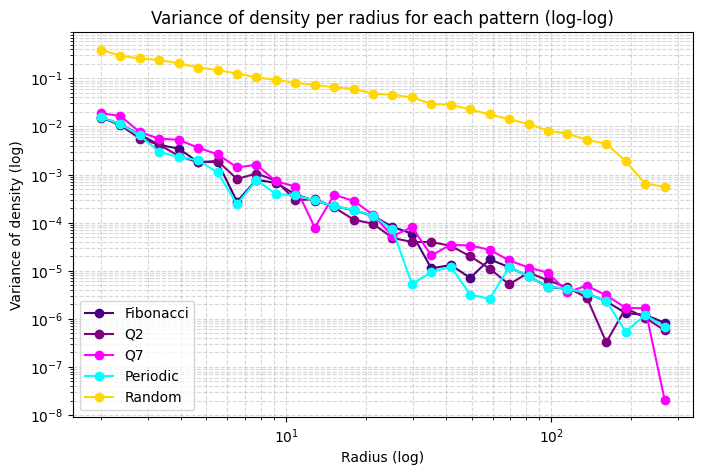

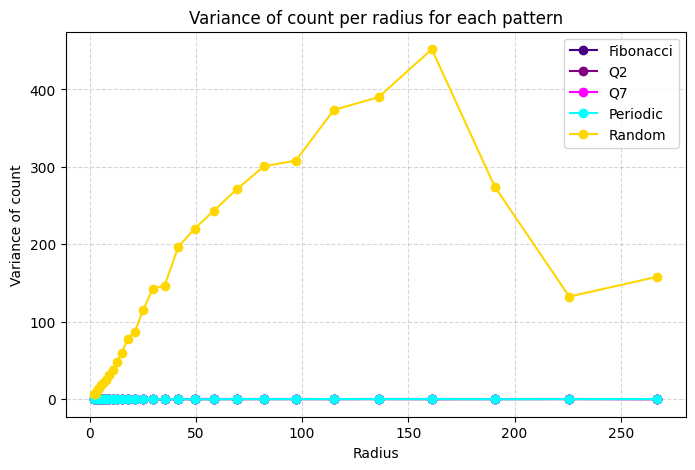

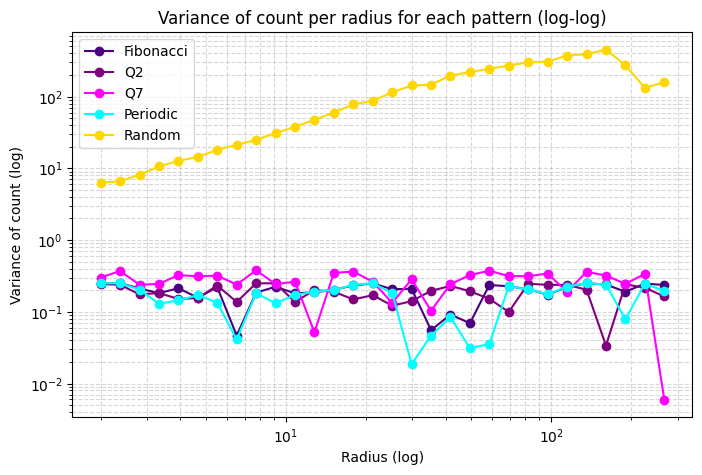

In [19]:
pattern_colors = {
    'Fibonacci': 'indigo',
    'Q2': 'purple',
    'Q7': 'magenta',
    'Periodic': 'aqua',
    'Random': 'gold'
}

# 1. Variance of density (normal)
plt.figure(figsize=(8,5))
for pattern in df['pattern'].unique():
    plt.plot(
        df[df['pattern'] == pattern]['radius'],
        df[df['pattern'] == pattern]['var_density'],
        marker='o',
        label=pattern,
        color=pattern_colors.get(pattern, 'black')  
    )
plt.xlabel('Radius')
plt.ylabel('Variance of density')
plt.title('Variance of density per radius for each pattern')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()

# 2. Variance of density (log-log)
plt.figure(figsize=(8,5))
for pattern in df['pattern'].unique():
    plt.plot(
        df[df['pattern'] == pattern]['radius'],
        df[df['pattern'] == pattern]['var_density'],
        marker='o',
        label=pattern,
        color=pattern_colors.get(pattern, 'black')
    )
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius (log)')
plt.ylabel('Variance of density (log)')
plt.title('Variance of density per radius for each pattern (log-log)')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()

# 3. Variance of count (normal)
plt.figure(figsize=(8,5))
for pattern in df['pattern'].unique():
    plt.plot(
        df[df['pattern'] == pattern]['radius'],
        df[df['pattern'] == pattern]['var_count'],
        marker='o',
        label=pattern,
        color=pattern_colors.get(pattern, 'black')
    )
plt.xlabel('Radius')
plt.ylabel('Variance of count')
plt.title('Variance of count per radius for each pattern')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()

# 4. Variance of count (log-log)
plt.figure(figsize=(8,5))
for pattern in df['pattern'].unique():
    plt.plot(
        df[df['pattern'] == pattern]['radius'],
        df[df['pattern'] == pattern]['var_count'],
        marker='o',
        label=pattern,
        color=pattern_colors.get(pattern, 'black')
    )
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius (log)')
plt.ylabel('Variance of count (log)')
plt.title('Variance of count per radius for each pattern (log-log)')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()

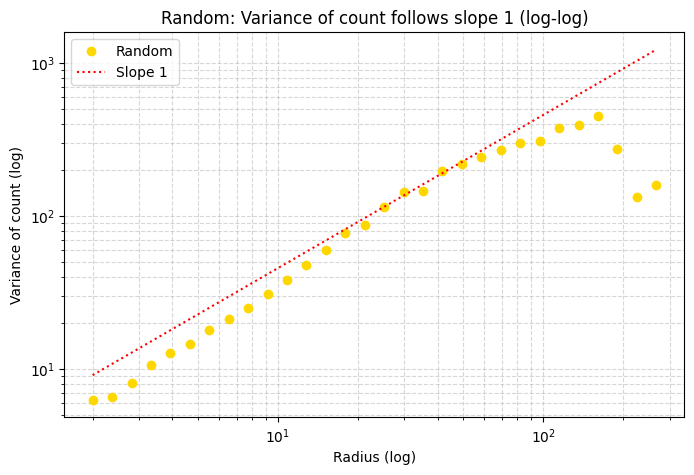

In [20]:
# Random
mask_random = (df['pattern'] == 'Random') & (~np.isnan(df['radius'])) & (~np.isnan(df['var_count']))
radii_random = df.loc[mask_random, 'radius'].values
var_count_random = df.loc[mask_random, 'var_count'].values
valid_random = (radii_random > 0) & (var_count_random > 0)
log_r_random = np.log10(radii_random[valid_random])
log_var_random = np.log10(var_count_random[valid_random])

plt.figure(figsize=(8,5))
plt.plot(radii_random[valid_random], var_count_random[valid_random], 'o', label='Random', color=pattern_colors['Random'])

# Slope 1 line passing through the midpoint
mid_idx = len(log_r_random) // 2
x0 = log_r_random[mid_idx]
y0 = log_var_random[mid_idx]
log_r_line = np.linspace(log_r_random.min(), log_r_random.max(), 100)
log_var_line = y0 + (log_r_line - x0) * 1  # slope 1
plt.plot(10**log_r_line, 10**log_var_line, ':', color='red', label='Slope 1')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius (log)')
plt.ylabel('Variance of count (log)')
plt.title('Random: Variance of count follows slope 1 (log-log)')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()

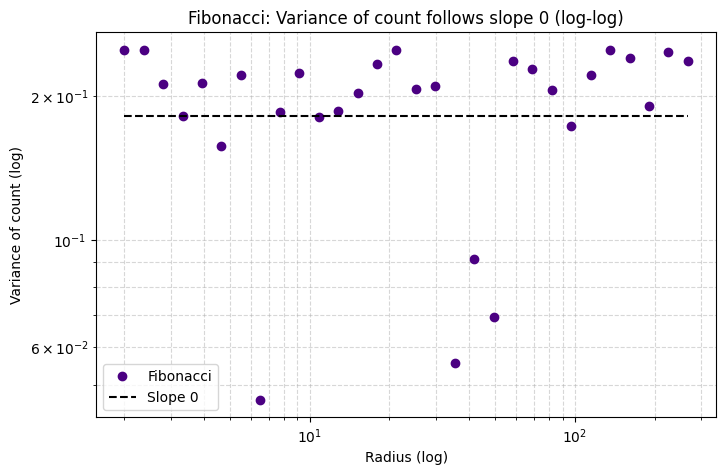

In [21]:
# Fibonacci
mask_fib = (df['pattern'] == 'Fibonacci') & (~np.isnan(df['radius'])) & (~np.isnan(df['var_count']))
radii_fib = df.loc[mask_fib, 'radius'].values
var_count_fib = df.loc[mask_fib, 'var_count'].values
valid_fib = (radii_fib > 0) & (var_count_fib > 0)
log_r_fib = np.log10(radii_fib[valid_fib])
log_var_fib = np.log10(var_count_fib[valid_fib])

plt.figure(figsize=(8,5))
plt.plot(radii_fib[valid_fib], var_count_fib[valid_fib], 'o', label='Fibonacci', color=pattern_colors['Fibonacci'])

# Horizontal line at the mean log_var value
mean_log_var = np.mean(log_var_fib)
plt.plot(radii_fib[valid_fib], np.full_like(radii_fib[valid_fib], 10**mean_log_var), '--', color='black', label='Slope 0')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius (log)')
plt.ylabel('Variance of count (log)')
plt.title('Fibonacci: Variance of count follows slope 0 (log-log)')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()

# Diffraction Pattern

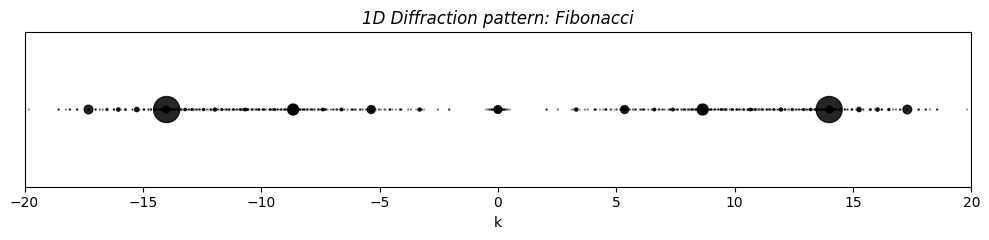

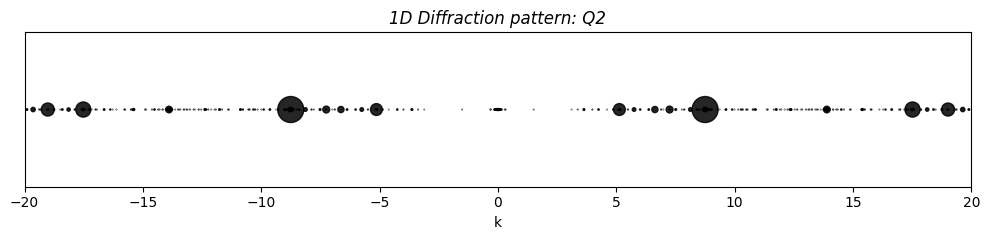

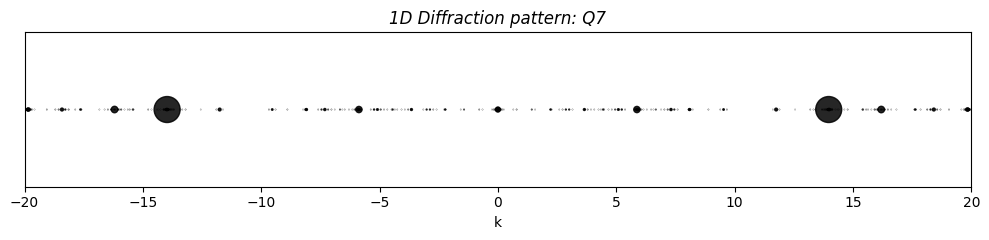

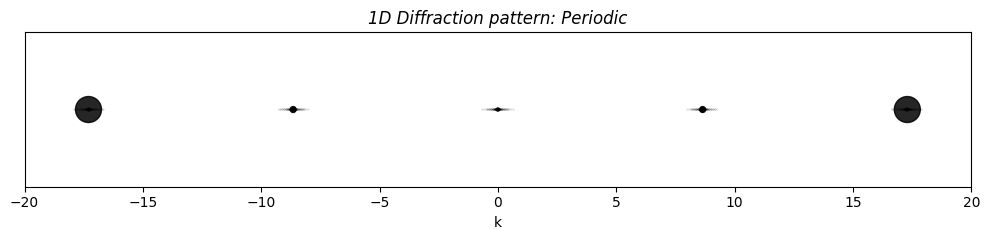

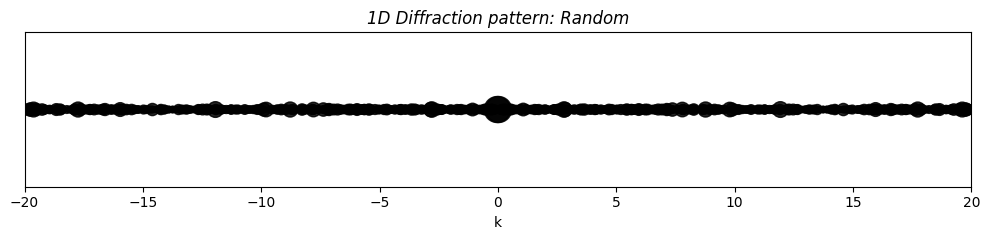

In [22]:
# Diffraction pattern
# This section computes and plots the diffraction pattern for each 1D pattern.
patterns_1d = {
    'Fibonacci': proj_points_1d_dict['Fibonacci'],
    'Q2': proj_points_1d_dict['Q2'],
    'Q7': proj_points_1d_dict['Q7'],
    'Periodic': periodic_1d,
    'Random': poisson_1d
}

k_vals = np.linspace(-20, 20, 2000)

for pattern_name, points_1d in patterns_1d.items():
    A_k = np.zeros_like(k_vals, dtype=np.complex128)
    for idx, k in enumerate(k_vals):
        A_k[idx] = np.sum(np.exp(1j * k * points_1d))
    I_k = np.abs(A_k)**2

    # Filter only points with significant intensity
    threshold = np.percentile(I_k, 99) * 0.01
    mask = I_k > threshold

    plt.figure(figsize=(10, 2.5))
    plt.scatter(
        k_vals[mask], np.zeros(np.sum(mask)),
        s=I_k[mask] / I_k.max() * 350,  
        color='black', alpha=0.85
    )
    plt.xlabel('k')
    plt.yticks([])
    plt.xticks(np.arange(-20, 21, 5))
    plt.xlim(-20, 20)
    plt.ylim(-1, 1)
    plt.title(f"1D Diffraction pattern: {pattern_name}", fontstyle='italic')
    plt.grid(False)  
    plt.tight_layout()
    plt.show()

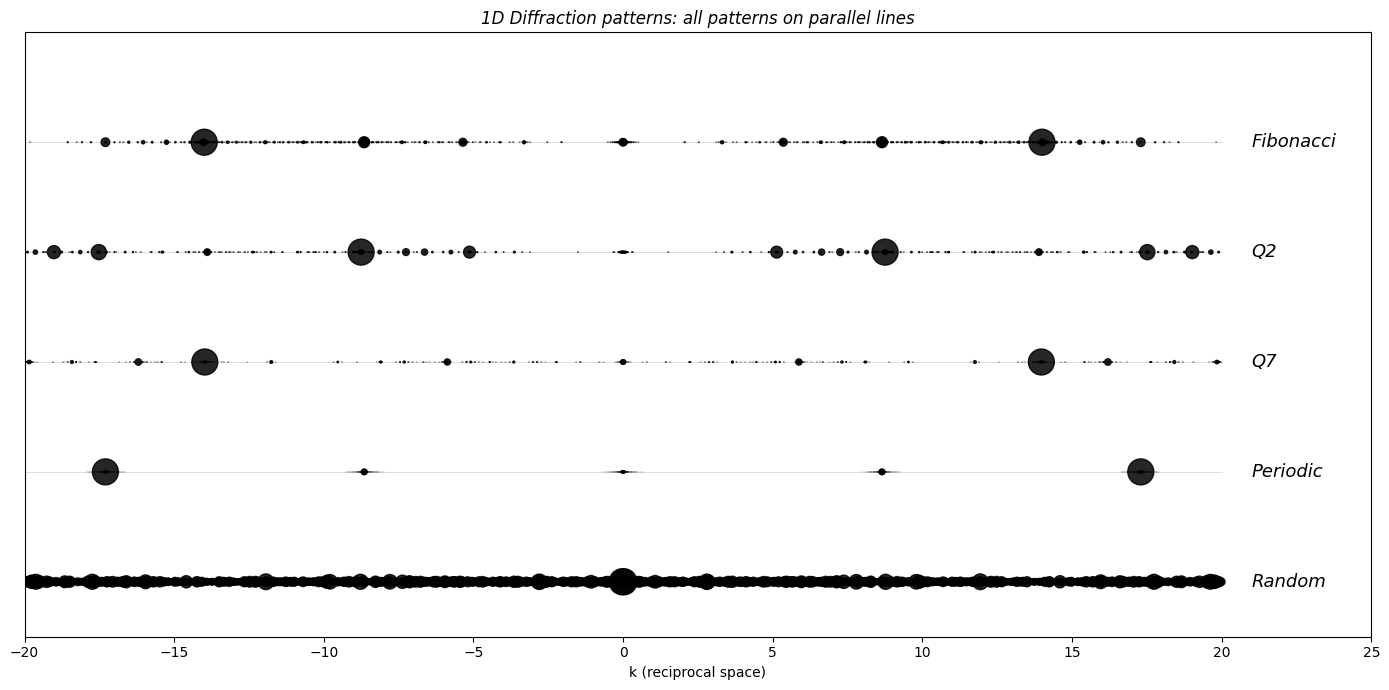

In [23]:
# This cell plots all diffraction patterns together for comparison.
patterns_1d = {
    'Fibonacci': proj_points_1d_dict['Fibonacci'],
    'Q2': proj_points_1d_dict['Q2'],
    'Q7': proj_points_1d_dict['Q7'],
    'Periodic': periodic_1d,
    'Random': poisson_1d
}

k_vals = np.linspace(-20, 20, 2000)
pattern_names = list(patterns_1d.keys())

plt.figure(figsize=(14, 7))
y_offsets = np.arange(len(pattern_names))[::-1] * 2  

for i, pattern_name in enumerate(pattern_names):
    points_1d = patterns_1d[pattern_name]
    A_k = np.zeros_like(k_vals, dtype=np.complex128)
    for idx, k in enumerate(k_vals):
        A_k[idx] = np.sum(np.exp(1j * k * points_1d))
    I_k = np.abs(A_k)**2

    # Filter only points with significant intensity
    threshold = np.percentile(I_k, 99) * 0.01
    mask = I_k > threshold

    y0 = y_offsets[i]
    plt.plot([-20, 20], [y0, y0], color='#dddddd', linewidth=0.7, zorder=1)
    plt.scatter(
        k_vals[mask], np.full(np.sum(mask), y0),
        s=I_k[mask] / I_k.max() * 350,
        color='black', alpha=0.85, zorder=2
    )
    plt.text(21, y0, pattern_name, va='center', fontsize=13, fontstyle='italic')

plt.yticks([])
plt.ylim(-1, y_offsets[0]+2)
plt.xlim(-20, 25)
plt.xlabel("k (reciprocal space)")
plt.title("1D Diffraction patterns: all patterns on parallel lines", fontstyle='italic')
plt.grid(False)
plt.tight_layout()
plt.show()